# Harris Corner Detection

This document is based on 

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html



## Theory

Corners are regions in the image with large variation in intensity in all the directions. One early attempt to find these corners was done by **Chris Harris & Mike Stephens** in their paper, "**A Combined Corner and Edge Detector**" in 1988, so now it is called **Harris Corner Detector**. He took this simple idea to a mathematical form. It basically finds the difference in intensity for a displacement of $(u,v)$ in all directions. This is expressed as below:

\begin{equation*}
E(u,v) = \sum_{x,y} \underbrace{w(x,y)}_\text{window function}
[ \underbrace{I(x+u, y+v)}_\text{shifted intensity} -
\underbrace{I(x, y)}_\text{intensity}
]^2
\end{equation*}

Window function $w(x,y)$ is either a rectangular window or gaussian window which gives weights to pixels underneath.

In [ ]:
! git clone https://github.com/soonkijung/cv-datasets

Cloning into 'cv-datasets'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 40 (delta 2), reused 0 (delta 0), pack-reused 37
Unpacking objects: 100% (40/40), done.


## Step 1: Convert the image to Grayscale

In [ ]:
from skimage import color
from skimage import io
from matplotlib import pyplot as plt 
import scipy
import numpy as np

originalImg = color.rgb2gray(io.imread('/content/cv-datasets/blocks.gif'))

# three sample cases for easy understanding
sPtrs = [90, 15, 147, 110, 144, 198] # y1, x1, y2, x2, y3, x3
hSize = 5 # half Size
s1 = originalImg[sPtrs[0]-hSize:sPtrs[0]+hSize+1, sPtrs[1]-hSize:sPtrs[1]+hSize+1]
s2 = originalImg[sPtrs[2]-hSize:sPtrs[2]+hSize+1, sPtrs[3]-hSize:sPtrs[3]+hSize+1]
s3 = originalImg[sPtrs[4]-hSize:sPtrs[4]+hSize+1, sPtrs[5]-hSize:sPtrs[5]+hSize+1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  import sys


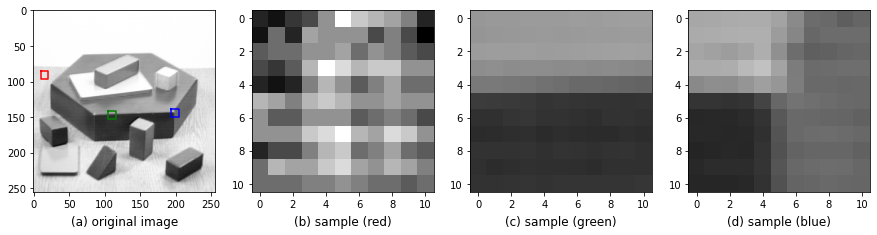

In [ ]:
def drawBox(ax, xp, yp, hs, color):
    ax.plot([xp-hs, xp+hs+1, xp+hs+1, xp-hs, xp-hs], [yp-hs, yp-hs, yp+hs+1, yp+hs+1, yp-hs], color=color)

fig, axs = plt.subplots(1, 4, figsize=(15, 6.5))
axs[0].imshow(originalImg, cmap='gray')
drawBox(axs[0], sPtrs[1], sPtrs[0], hSize, 'red')
drawBox(axs[0], sPtrs[3], sPtrs[2], hSize, 'green')
drawBox(axs[0], sPtrs[5], sPtrs[4], hSize, 'blue')
axs[0].text(0.5, -0.18, '(a) original image', size=12, ha='center', transform=axs[0].transAxes)
# axs[1].imshow(s1, vmin=0, vmax=255, cmap='gray')
axs[1].imshow(s1, cmap='gray')
axs[1].text(0.5, -0.18, '(b) sample (red)', size=12, ha='center', transform=axs[1].transAxes)
axs[2].imshow(s2, vmin=0, vmax=255, cmap='gray')
axs[2].text(0.5,-0.18, '(c) sample (green)', size=12, ha='center', transform=axs[2].transAxes)
axs[3].imshow(s3, vmin=0, vmax=255, cmap='gray')
axs[3].text(0.5,-0.18, '(d) sample (blue)', size=12, ha='center', transform=axs[3].transAxes)
plt.show()

In [ ]:
def calcEuv(image, x, y, hSize, offset):
    s = image[y-hSize:y+hSize+1, x-hSize:x+hSize+1]
    Euv = np.zeros((2*offset+1, 2*offset+1))
    for u in range(-offset, offset+1):
        for v in range(-offset, offset+1):
            shifted = image[y+u-hSize:y+u+hSize+1, x+v-hSize:x+v+hSize+1]
            Euv[u+offset,v+offset] = ((shifted - s)**2).sum()
    return Euv

print("Define calcEuv")

window_size = 5
offset = window_size // 2
Euv1 = calcEuv(originalImg, hSize, sPtrs[1], sPtrs[0], offset)
Euv2 = calcEuv(originalImg, hSize, sPtrs[3], sPtrs[2], offset)
Euv3 = calcEuv(originalImg, hSize, sPtrs[5], sPtrs[4], offset)

Define calcEuv


ValueError: ignored

In [ ]:
maxV = max([np.max(Euv1), np.max(Euv2), np.max(Euv3)])
fig, axs = plt.subplots(1, 4, figsize=(15, 6.5))
axs[0].imshow(originalImg, cmap='gray')
drawBox(axs[0], sPtrs[1], sPtrs[0], hSize, 'red')
drawBox(axs[0], sPtrs[3], sPtrs[2], hSize, 'green')
drawBox(axs[0], sPtrs[5], sPtrs[4], hSize, 'blue')
axs[0].text(0.5, -0.18, '(a) original image', size=12, ha='center', transform=axs[0].transAxes)
axs[1].imshow(Euv1, vmax = maxV, cmap='gray')
axs[1].text(0.5, -0.18, '(b) E(u,v) (red)', size=12, ha='center', transform=axs[1].transAxes)
axs[2].imshow(Euv2, vmax = maxV, cmap='gray')
axs[2].text(0.5, -0.18, '(c) E(u,v) (red)', size=12, ha='center', transform=axs[2].transAxes)
axs[3].imshow(Euv3, vmax = maxV, cmap='gray')
axs[3].text(0.5, -0.18, '(d) E(u,v) (red)', size=12, ha='center', transform=axs[3].transAxes)
plt.show()

NameError: ignored

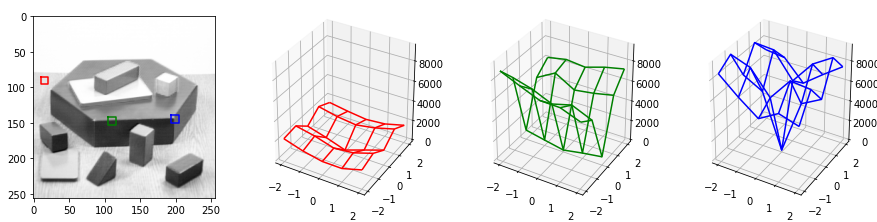

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15, 3.7))

X = np.arange(-offset, offset+1)
Y = np.arange(-offset, offset+1)
X, Y = np.meshgrid(X, Y)
Z1 = Euv1[Y+offset,X+offset]
Z2 = Euv2[Y+offset,X+offset]
Z3 = Euv3[Y+offset,X+offset]

ax0 = fig.add_subplot(141)
ax0.imshow(originalImg, cmap='gray')
drawBox(ax0, sPtrs[1], sPtrs[0], hSize, 'red')
drawBox(ax0, sPtrs[3], sPtrs[2], hSize, 'green')
drawBox(ax0, sPtrs[5], sPtrs[4], hSize, 'blue')

ax1 = fig.add_subplot(142, projection='3d')
ax1.plot_wireframe(X,Y,Z1, color='red')

ax2 = fig.add_subplot(143, projection='3d', sharez=ax1)
ax2.plot_wireframe(X,Y,Z2, color='green')

ax3 = fig.add_subplot(144, projection='3d', sharez=ax1)
ax3.plot_wireframe(X,Y,Z3, color='blue')

plt.show()

## Taylor Polynomials of Functions of Two Variables, $f(x,y)$



### Review of Taylor Polynomials for a Function of One Variable



#### Definition: Taylor polynomials for a function of one variable, $𝑦 = 𝑓(𝑥)$ 

If $f$ has $n$ derivatives at $x = c$, then the polynomial,

\begin{equation*}
P_n(x) = f(c) + f'(c)(x-c) + \frac{f''(c)}{2!} (x-c)^2 + \cdots + \frac{f^{(n)}(c)}{n!} (x-c)^n
\end{equation*}
is called the $n^{th}$-degree **Taylor Polynomial** for $f$ at $c$.

Now a function of one variable $f(x)$ can be approximated for $x$ near $c$ using its 1$^{st}$-degree Taylor Polynomial (i.e., using the equation of its **tangent line** at the point $(c, f(c))$. This 1$^{st}$-degree Taylor Polynomial is also called the **linear approximation** of $f(x)$ for $x$ near $c$.

That is:

\begin{equation*}
f(x) \approx f(c) + f'(c)(x-c)
\end{equation*}

Another representation is
\begin{equation*}
f(x+\Delta x) \approx f(x) + f'(x) \Delta x
\end{equation*}
 


### 1st-Degree of Taylor Polynomials for Functions of Two Variables

Taylor Polynomials work the same way for functions of two variables. 

#### Definition: first-degree Taylor polynomial of a function of two variables, $f(x,y)$ 
For a function of two variables $f(x,y)$ whose first partials exist at the point $(a, b)$, the 1$^{st}$-degree Taylor polynomial of $f$ for $(x,y)$ near the point $(a,b)$ is:

\begin{equation*}
f(x,y) \approx L(x, y) = f(a,b) + f_x(a,b)(x -a) + f_y(a,b)(y -b)
\end{equation*}

$L(x,y)$ is also called the **linear** (or **tngent plane**) approximation of $f$ for $(x,y)$ near the point $(a, b)$.

Note that the first partial derivatives of this polynomial function are $f_x = \frac{\partial f(x,y)}{\partial x}$ and $f_y = \frac{\partial f(x,y)}{\partial y}$. 

Similar representation is
\begin{equation*}
f(x+\Delta x,y+\Delta y) \approx f(x,y) + f_x\Delta x + f_y \Delta y.
\end{equation*}

The vector form of the 1$^{st}$-degree Taylor polynomial of $f$ is
\begin{equation*}
f(x+\Delta x,y+\Delta y) \approx f(x,y) + \nabla f^T \Delta \textbf{x},
\end{equation*}
where $\nabla f = \begin{bmatrix} f_x \\ f_y \end{bmatrix}$ and
$\Delta \textbf{x} = \begin{bmatrix} \Delta x \\ \Delta y \end{bmatrix}$.

## Theory (revisited)

The function was
\begin{equation*}
E(u,v) = \sum_{x,y} \underbrace{w(x,y)}_\text{window function}
[ \underbrace{I(x+u, y+v)}_\text{shifted intensity} -
\underbrace{I(x, y)}_\text{intensity}
]^2
\end{equation*}

The linear approximation of $I(x+u,y+v)$ for $(u,v)$ near the point $(x,y)$ is:
\begin{equation*}
I(x+u,y+v) \approx I(x,y) + I_x(x,y)u + I_y(x,y)v
\end{equation*}

So
\begin{aligned}
\begin{bmatrix} I(x+u,y+v)-I(x,y) \end{bmatrix}^2 & \approx [I(x,y) + I_x u + I_xv - I(x,y)) ]^2 \\
& = [I_x u + I_y v] ^2
\end{aligned}

WWe get the final equation as:

\begin{equation*}
E(u,v) \approx \begin{bmatrix} u & v \end{bmatrix} M \begin{bmatrix} u \\ v \end{bmatrix}
\end{equation*}

where

\begin{equation*}
M = \sum_{x,y} w(x,y) \begin{bmatrix}I_x^2 & I_x I_y \\
                                     I_x I_y & I_y^2 \end{bmatrix}
\end{equation*}

## Step 2: Spatial derivative calculation

We use the Sobel filter to obtain the derivatives

In [ ]:
from scipy import signal

def gradient_x(imggray):
    # Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    return signal.convolve2d(imggray, kernel_x, mode='same')

def gradient_y(imggray):
    # Sobel operator kernels.
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return signal.convolve2d(imggray, kernel_y, mode='same')

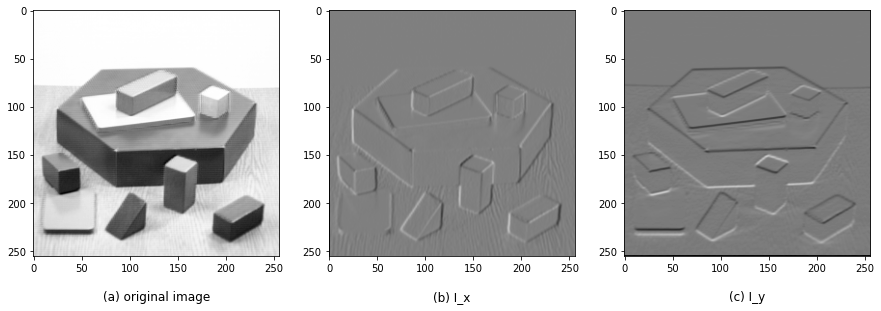

In [ ]:
I_x = gradient_x(originalImg)
I_y = gradient_y(originalImg)

fig, axs = plt.subplots(1, 3, figsize=(15, 6.5))
axs[0].imshow(originalImg, cmap='gray')
axs[0].text(0.5, -0.18, '(a) original image', size=12, ha='center', transform=axs[0].transAxes)
axs[1].imshow(I_x, cmap='gray')
axs[1].text(0.5, -0.18, '(b) I_x', size=12, ha='center', transform=axs[1].transAxes)
axs[2].imshow(I_y, cmap='gray')
axs[2].text(0.5, -0.18, '(c) I_y', size=12, ha='center', transform=axs[2].transAxes)
plt.show()

## Step 3: The Second-Order Derivatives of Image

In [ ]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

print("Define gaussian_kernel")

gKernel = gaussian_kernel(5, 1.4)

Define gaussian_kernel


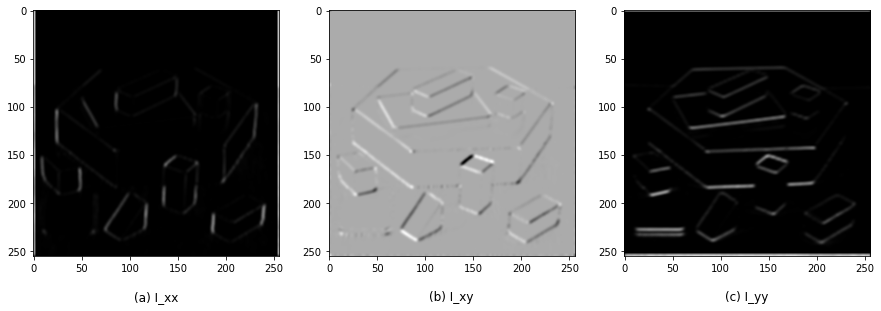

In [ ]:
gI_xx = signal.convolve2d(I_x**2, gKernel, mode='same')
gI_xy = signal.convolve2d(I_x*I_y, gKernel, mode='same')
gI_yy = signal.convolve2d(I_y**2, gKernel, mode='same')

fig, axs = plt.subplots(1, 3, figsize=(15, 6.5))
axs[0].imshow(gI_xx, cmap='gray')
axs[0].text(0.5, -0.18, '(a) I_xx', size=12, ha='center', transform=axs[0].transAxes)
axs[1].imshow(gI_xy, cmap='gray')
axs[1].text(0.5, -0.18, '(b) I_xy', size=12, ha='center', transform=axs[1].transAxes)
axs[2].imshow(gI_yy, cmap='gray')
axs[2].text(0.5, -0.18, '(c) I_yy', size=12, ha='center', transform=axs[2].transAxes)
plt.show()

## Step 4: Harris response calculation

We first calculate the sum of squares of our gradient at each pixel by shifting a window over all the pixels in the image. The window is shifted according to the offset which you decided based on your image.
The window function $w(x,y)$ is 1 in the window, and 0 out of the window. In this experiment, the window size is 5. 

$\alpha$ is the sensitivity factor to separate corners from edges, typically $(0.04$ to $0.06)$, for this experiment I have taken $\alpha=0.04$. Small values of $\alpha$ result in detection of sharp corners.

The cornerness, $C = \lambda_1 \lambda_2 - \alpha (\lambda_1 + \lambda_2)^2$ and calculated by
$C = \det(M) - \alpha \mbox{ trace}(M)^2$

In [ ]:
image_copy = color.gray2rgb(originalImg)
height = originalImg.shape[0]
width = originalImg.shape[1]
alpha = 0.04

corner = np.zeros((height, width), np.float32)
for y in range(window_size, height-window_size):
    for x in range(window_size, width-window_size):
        Sxx = np.sum(gI_xx[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(gI_xy[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(gI_yy[y-offset:y+1+offset, x-offset:x+1+offset])

        # Find determinant and trace, use to get the cornerness
        det = Sxx * Syy - Sxy**2
        trace = Sxx + Syy
        corner[y,x] = det - alpha*trace**2

In [ ]:
def non_maxima_suppression(response, thresh):
    h, w = response.shape
    result = np.zeros((h, w))    
    for y in range(h-1):
        for x in range(w-1):
            if response[y, x] > thresh and\
                response[y, x] > response[y-1, x-1] and\
                response[y, x] > response[y-1, x] and\
                response[y, x] > response[y-1, x+1] and\
                response[y, x] > response[y, x-1] and\
                response[y, x] > response[y, x+1] and\
                response[y, x] > response[y+1, x-1] and\
                response[y, x] > response[y+1, x] and\
                response[y, x] > response[y+1, x+1]:
                result[y, x] = 1
                for d in range(-3, 4):
                    result[y+d, x] = result[y, x+d] = 1
    return result

print("Define non maxima supression")

Define non maxima supression


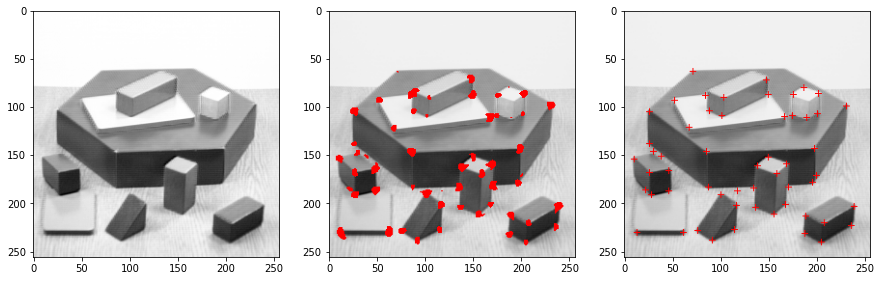

In [ ]:
thresh = 0.01*corner.max()
image_copy[corner > thresh] = [255, 0, 0]

result = non_maxima_suppression(corner, thresh)
image_copy2 = color.gray2rgb(originalImg)
image_copy2[result == 1] = [255, 0, 0]

fig, axs = plt.subplots(1, 3, figsize=(15, 6.5))
axs[0].imshow(originalImg, cmap='gray')
axs[1].imshow(image_copy)
axs[2].imshow(image_copy2)
plt.show()

## cv2.cornerHarris

Use the Harris corner detector in OpenCV library.

```
cv2.cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) : dst 
```
Parameters:
*   `src` - Input single-channel 8-bit or floating-point image.
*   `dst` - Image to store the Harris detector responses. It has the type `CV_32FC1` and the same size as `src`.
*   `blockSize` - Neighborhood size 
*   `ksize` - Aperture parameter for the `Sobel()` operator.
*   `k` - Harris detector free parameter. $\alpha$
*   `borderType` - Pixel extrapolation method.

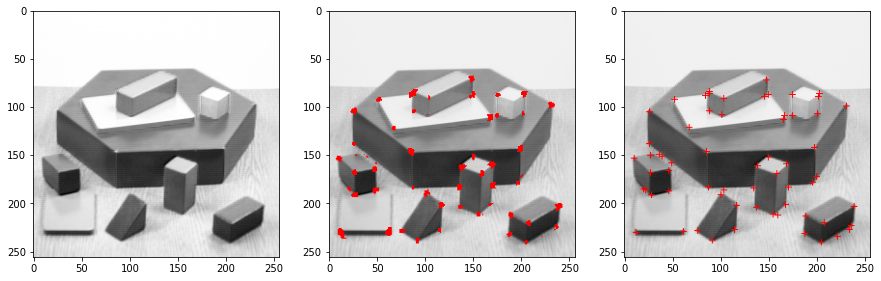

In [ ]:
import cv2

dest = cv2.cornerHarris(originalImg, window_size, 3, 0.04)

image_copy = color.gray2rgb(originalImg)
thresh = 0.01 * dest.max()
image_copy[dest > thresh] = [255, 0, 0]

result = non_maxima_suppression(dest, thresh)
image_copy2 = color.gray2rgb(originalImg)
image_copy2[result == 1] = [255, 0, 0]

fig, axs = plt.subplots(1, 3, figsize=(15, 6.5))
axs[0].imshow(originalImg, cmap='gray')
axs[1].imshow(image_copy)
axs[2].imshow(image_copy2)
plt.show()

# HomeWork

In [80]:
# Non_maxima_suppression을 거치고 남은 것들 중에 10개의 가장 강한 코너를 뽑는 함수로 변경하였음.
def non_maxima_suppression(response, thresh):
    h, w = response.shape
    result = np.zeros((h, w))
    myList = []

    # Non_maxima_suppression 과정을 먼저 거친다.    
    for y in range(h-1):
        for x in range(w-1):
            if response[y, x] > thresh and\
                response[y, x] > response[y-1, x-1] and\
                response[y, x] > response[y-1, x] and\
                response[y, x] > response[y-1, x+1] and\
                response[y, x] > response[y, x-1] and\
                response[y, x] > response[y, x+1] and\
                response[y, x] > response[y+1, x-1] and\
                response[y, x] > response[y+1, x] and\
                response[y, x] > response[y+1, x+1]:

                # myList에 위 조건을 통과한 점의 값을 저장함
                myList.append(response[y,x])
    # myList을 내림 차순으로 정렬하고 10번째 숫자를 뽑아냄 (10번째로 strongest한 courner)
    myList.sort(reverse=True)
    Max10 = myList[9]
    count = 0
    for y in range(h-1):
        for x in range(w-1):
            if response[y, x] > thresh and\
                response[y, x] > response[y-1, x-1] and\
                response[y, x] > response[y-1, x] and\
                response[y, x] > response[y-1, x+1] and\
                response[y, x] > response[y, x-1] and\
                response[y, x] > response[y, x+1] and\
                response[y, x] > response[y+1, x-1] and\
                response[y, x] > response[y+1, x] and\
                response[y, x] > response[y+1, x+1] and\
                response[y, x] > Max10: # 10번째 수를 포함해 그보다 큰것들 모두 result 값을 1로 만듬
              
              result[y, x] = 1
              count += 1 # count는 총 몇개의 점이 찍혔나를 포함
              for d in range(-4, 5):
                    result[y+d, x] = result[y, x+d] = 1

    # Max10과 같은 courner 값이 여러개 있을 수 있으니 한번 더 처리해준다.
    for y in range(h-1):
        for x in range(w-1):
          if response[y, x] > thresh and\
              response[y, x] == Max10 and\
              count < 10:

            result[y, x] = 1
            count += 1
            for d in range(-4, 5):
                    result[y+d, x] = result[y, x+d] = 1

    print('최대', count, '개의 점을 출력합니다.', count, '번째로 strongest한 courner의 값은', Max10, '입니다.')
    return result

print("Define non maxima supression")

Define non maxima supression


fatal: destination path 'cv-datasets' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  # This is added back by InteractiveShellApp.init_path()


최대 10 개의 점을 출력합니다. 10 번째로 strongest한 courner의 값은 0.00085136725 입니다.


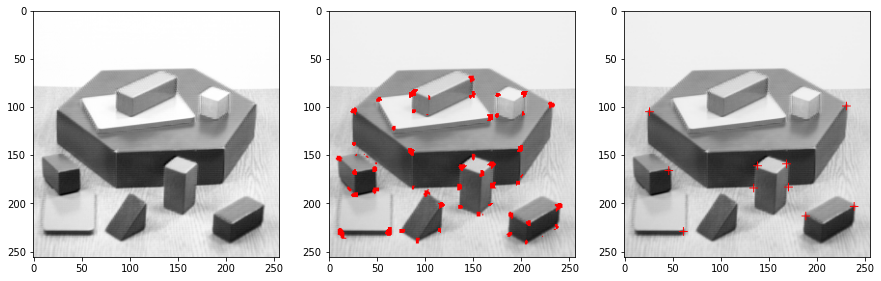

In [81]:
from skimage import color
from skimage import io
from matplotlib import pyplot as plt 
import scipy
import numpy as np
import cv2

! git clone https://github.com/soonkijung/cv-datasets

window_size = 5
originalImg = color.rgb2gray(io.imread('/content/cv-datasets/blocks.gif'))
dest = cv2.cornerHarris(originalImg, window_size, 3, 0.04)

image_copy = color.gray2rgb(originalImg)
thresh = 0.01 * dest.max()
image_copy[dest > thresh] = [255, 0, 0]

result = non_maxima_suppression(dest, thresh)
image_copy2 = color.gray2rgb(originalImg)
image_copy2[result == 1] = [255, 0, 0]


fig, axs = plt.subplots(1, 3, figsize=(15, 6.5))
axs[0].imshow(originalImg, cmap='gray')
axs[1].imshow(image_copy)
axs[2].imshow(image_copy2)
plt.show()